# S09 T01: Feature Engineering

In [1]:
# Pandas for managing datasets
import pandas as pd
import numpy as np

# Matplotlib for additional customization
import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn for plotting and styling
import seaborn as sns

#preprocessing and analysis
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing

## Nivell 1. Exercici 1
### Agafa un conjunt de dades de tema esportiu que t'agradi i normalitza els atributs categòrics en dummy. 
### Estandaritza els atributs numèrics amb StandardScaler.

In [2]:
df = pd.read_csv("fitness analysis.csv")
df.head(3)

,Timestamp,Your name,Your gender,Your age,How important is exercise to you ?,How do you describe your current level of fitness ?,How often do you exercise?,"What barriers, if any, prevent you from exercising more regularly? (Please select all that apply)",What form(s) of exercise do you currently participate in ? (Please select all that apply),Do you exercise ___________ ?,What time if the day do you prefer to exercise?,How long do you spend exercising per day ?,Would you say you eat a healthy balanced diet ?,"What prevents you from eating a healthy balanced diet, If any? (Please select all that apply)",How healthy do you consider yourself?,Have you ever recommended your friends to follow a fitness routine?,Have you ever purchased a fitness equipment?,What motivates you to exercise? (Please select all that applies )
0,2019/07/03 11:48:07 PM GMT+5:30,Parkavi,Female,19 to 25,2,Good,Never,I don't have enough time;I can't stay motivated,I don't really exercise,I don't really exercise,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,3,Yes,No,I'm sorry ... I'm not really interested in exe...
1,2019/07/03 11:51:22 PM GMT+5:30,Nithilaa,Female,19 to 25,4,Very good,Never,I don't have enough time;I'll become too tired,Walking or jogging;Swimming,With a group,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to be fit;I want to be flexible;I want ...
2,2019/07/03 11:56:28 PM GMT+5:30,Karunya v,Female,15 to 18,3,Good,1 to 2 times a week,I can't stay motivated,Walking or jogging,Alone,Early morning,30 minutes,Not always,Temptation and cravings,4,Yes,Yes,I want to be fit


In [4]:
df.columns=["Timestamp","name","gender", "age","exercise_importance","fitness_level","how_often_ex","barriers_ex","current_ex","exercise_with", "daytime_ex", "how_long", "healthy_diet","barriers_healthydiet", "how_healthy","fitness_recom", "purchase_fitness", "reasons_ex"]  
# cambiamos los nombres a las columnas por labels más cortos
df.columns

Index(['Timestamp', 'name', 'gender', 'age', 'exercise_importance',
       'fitness_level', 'how_often_ex', 'barriers_ex', 'current_ex',
       'exercise_with', 'daytime_ex', 'how_long', 'healthy_diet',
       'barriers_healthydiet', 'how_healthy', 'fitness_recom',
       'purchase_fitness', 'reasons_ex'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Timestamp             545 non-null    object
 1   name                  545 non-null    object
 2   gender                545 non-null    object
 3   age                   545 non-null    object
 4   exercise_importance   545 non-null    int64 
 5   fitness_level         545 non-null    object
 6   how_often_ex          545 non-null    object
 7   barriers_ex           545 non-null    object
 8   current_ex            545 non-null    object
 9   exercise_with         545 non-null    object
 10  daytime_ex            545 non-null    object
 11  how_long              545 non-null    object
 12  healthy_diet          545 non-null    object
 13  barriers_healthydiet  545 non-null    object
 14  how_healthy           545 non-null    int64 
 15  fitness_recom         545 non-null    ob

In [6]:
df.isna().sum().median()

0.0

In [7]:
# Simplificamos el df y nos quedamos con una reducida
new_df = df[["gender","age","exercise_importance", "fitness_level","how_often_ex", "how_long", "reasons_ex","current_ex"]].copy()
new_df.head(3)

,gender,age,exercise_importance,fitness_level,how_often_ex,how_long,reasons_ex,current_ex
0,Female,19 to 25,2,Good,Never,I don't really exercise,I'm sorry ... I'm not really interested in exe...,I don't really exercise
1,Female,19 to 25,4,Very good,Never,I don't really exercise,I want to be fit;I want to be flexible;I want ...,Walking or jogging;Swimming
2,Female,15 to 18,3,Good,1 to 2 times a week,30 minutes,I want to be fit,Walking or jogging


In [8]:
new_df.how_long.unique()

array(["I don't really exercise", '30 minutes', '1 hour', '2 hours',
       '3 hours and above'], dtype=object)

In [9]:
# Usamos REPLACE 
# Primero, creamos un mapping dictionary con los valores para cada columna.


# age: "15 to 18":1, "19 to 25":2, "26 to 30":3, "30 to 40":4, "40 and above":5
# how_often_ex: 1-2 times/week:1, 2-3 times/week:2, 3-4 times/week:3, 5-6 times/week:4
# how_long: I don't really exercise:1, 30 min:2, 1hour:3, 2hours:4, 3hours and above:5.

clean_nums = {"age": {"15 to 18":1, "19 to 25":2, "26 to 30":3, "30 to 40":4, "40 and above":5 },
              "how_often_ex":{"Never": 1, "1 to 2 times a week": 2, "3 to 4 times a week": 3, "Everyday": 4, 
                              "2 to 3 times a week": 5, "5 to 6 times a week":6},
              "how_long":{"I don't really exercise": 1, "30 minutes":2, "1 hour":3, "2 hours":4, "3 hours and above":5}
              }

# Para convertir las columnas a números, usamos replace:

new_df = new_df.replace(clean_nums)
new_df.head()

,gender,age,exercise_importance,fitness_level,how_often_ex,how_long,reasons_ex,current_ex
0,Female,2,2,Good,1,1,I'm sorry ... I'm not really interested in exe...,I don't really exercise
1,Female,2,4,Very good,1,1,I want to be fit;I want to be flexible;I want ...,Walking or jogging;Swimming
2,Female,1,3,Good,2,2,I want to be fit,Walking or jogging
3,Female,1,4,Good,3,3,I want to be fit;I want to lose weight,Walking or jogging;Gym;Lifting weights
4,Female,2,3,Unfit,1,1,I want to be fit,I don't really exercise


In [10]:
new_df.shape

(545, 8)

In [11]:
# Variable de Respuesta múltiple
df.current_ex.unique()

array(["I don't really exercise", 'Walking or jogging;Swimming',
       'Walking or jogging', 'Walking or jogging;Gym;Lifting weights',
       'Walking or jogging;Yoga', 'Gym;Team sport', 'Gym',
       'Walking or jogging;Team sport',
       "Walking or jogging;I don't really exercise",
       'Walking or jogging;Gym', 'Team sport', 'Zumba dance', 'Yoga',
       'Walking or jogging;Gym;Lifting weights;Team sport',
       'Walking or jogging;Gym;Yoga;Lifting weights', 'Gym;Swimming',
       'Gym;Lifting weights;Team sport',
       'Walking or jogging;Swimming;Lifting weights',
       'Walking or jogging;Gym;Yoga',
       'Walking or jogging;Zumba dance;Team sport',
       'Walking or jogging;Zumba dance', 'Gym;Swimming;Lifting weights',
       "Team sport;I don't really exercise",
       'Walking or jogging;Lifting weights',
       'Walking or jogging;Yoga;Team sport', 'Swimming',
       'Gym;Lifting weights', 'Walking or jogging;Gym;Swimming',
       'Walking or jogging;Gym;Team sport'

In [12]:
# Transformamos la variable current_ex, de respuesta múltiple, en dummies

current_exercises_dummy = new_df['current_ex'].str.get_dummies(sep=';')
current_exercises_dummy.head()

,Gym,I don't really exercise,Lifting weights,Swimming,Team sport,Walking or jogging,Yoga,Zumba dance
0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,1,0,0
2,0,0,0,0,0,1,0,0
3,1,0,1,0,0,1,0,0
4,0,1,0,0,0,0,0,0


In [13]:
current_exercises_dummy.shape

(545, 8)

In [14]:
new_df = new_df.merge(current_exercises_dummy, left_index=True, right_index=True)
new_df.head(3)

,gender,age,exercise_importance,fitness_level,how_often_ex,how_long,reasons_ex,current_ex,Gym,I don't really exercise,Lifting weights,Swimming,Team sport,Walking or jogging,Yoga,Zumba dance
0,Female,2,2,Good,1,1,I'm sorry ... I'm not really interested in exe...,I don't really exercise,0,1,0,0,0,0,0,0
1,Female,2,4,Very good,1,1,I want to be fit;I want to be flexible;I want ...,Walking or jogging;Swimming,0,0,0,1,0,1,0,0
2,Female,1,3,Good,2,2,I want to be fit,Walking or jogging,0,0,0,0,0,1,0,0


In [15]:
new_df.shape # se han añadido las nuevas columnas al new_df

(545, 16)

In [16]:
# Transformamos la variable reasons_ex, de respuesta múltiple, en dummies
reasons_dummy = new_df['reasons_ex'].str.get_dummies(sep=';')
reasons_dummy.head(3)

,Control Diabetes,Doing exercises prevents many diseases.So yeah saves a lot of money .,Exercising gives you discipline and focus and removed bad thoughts from your mind.,Going to class on time 😉,Gotta get that alcohol and **** out of the system,I dont wanna gain weight😉,I want to achieve a sporting goal,I want to be fit,I want to be flexible,I want to increase muscle mass and strength,...,I want to lose weight,I want to relieve stress,I want to think clearly and I want to play cricket with my grandkids,I'm sorry ... I'm not really interested in exercising,My dad motivates me,Not doing exercise,Personal reasons,Reaching class on time 😅,"See the answer to what barriers, if any, prevent you from exercising regularly",To maintain healthy body and mind
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,1,0,...,0,1,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
reasons_dummy.info () 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 21 columns):
 #   Column                                                                              Non-Null Count  Dtype
---  ------                                                                              --------------  -----
 0   Control Diabetes                                                                    545 non-null    int64
 1   Doing exercises prevents many diseases.So yeah saves a lot of money .               545 non-null    int64
 2   Exercising gives you discipline and focus and removed bad thoughts from your mind.  545 non-null    int64
 3   Going to class on time 😉                                                            545 non-null    int64
 4   Gotta get that alcohol and **** out of the system                                   545 non-null    int64
 5   I dont wanna gain weight😉                                                           545 non-null    int64
 6   I 

In [18]:
# Seleccionamos solo los atributos más importantes, descartando las respuestas con una sola observación.
reasons_df = reasons_dummy.iloc[:, [6,7,8,9,12,14]]
reasons_df

,I want to achieve a sporting goal,I want to be fit,I want to be flexible,I want to increase muscle mass and strength,I want to relieve stress,I'm sorry ... I'm not really interested in exercising
0,0,0,0,0,0,1
1,0,1,1,0,1,1
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
540,0,0,1,0,0,0
541,0,1,0,0,1,0
542,0,0,1,0,0,0
543,0,0,0,0,1,0


In [19]:
new_df = new_df.merge(reasons_df, left_index=True, right_index=True)
new_df.head()

,gender,age,exercise_importance,fitness_level,how_often_ex,how_long,reasons_ex,current_ex,Gym,I don't really exercise,...,Team sport,Walking or jogging,Yoga,Zumba dance,I want to achieve a sporting goal,I want to be fit,I want to be flexible,I want to increase muscle mass and strength,I want to relieve stress,I'm sorry ... I'm not really interested in exercising
0,Female,2,2,Good,1,1,I'm sorry ... I'm not really interested in exe...,I don't really exercise,0,1,...,0,0,0,0,0,0,0,0,0,1
1,Female,2,4,Very good,1,1,I want to be fit;I want to be flexible;I want ...,Walking or jogging;Swimming,0,0,...,0,1,0,0,0,1,1,0,1,1
2,Female,1,3,Good,2,2,I want to be fit,Walking or jogging,0,0,...,0,1,0,0,0,1,0,0,0,0
3,Female,1,4,Good,3,3,I want to be fit;I want to lose weight,Walking or jogging;Gym;Lifting weights,1,0,...,0,1,0,0,0,1,0,0,0,0
4,Female,2,3,Unfit,1,1,I want to be fit,I don't really exercise,0,1,...,0,0,0,0,0,1,0,0,0,0


In [20]:
new_df.shape # se han añadido las nuevas columnas dummy a new_df

(545, 22)

In [21]:
new_df.drop (["reasons_ex", "current_ex" ], axis=1, inplace=True) 
new_df.head(3)

,gender,age,exercise_importance,fitness_level,how_often_ex,how_long,Gym,I don't really exercise,Lifting weights,Swimming,Team sport,Walking or jogging,Yoga,Zumba dance,I want to achieve a sporting goal,I want to be fit,I want to be flexible,I want to increase muscle mass and strength,I want to relieve stress,I'm sorry ... I'm not really interested in exercising
0,Female,2,2,Good,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,Female,2,4,Very good,1,1,0,0,0,1,0,1,0,0,0,1,1,0,1,1
2,Female,1,3,Good,2,2,0,0,0,0,0,1,0,0,0,1,0,0,0,0


### Estandaritza els atributs numèrics amb StandardScaler.

In [22]:
features = ["age", "exercise_importance","how_often_ex","how_long"]

# Separating out the features
x = new_df.loc[:, features].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
print(x.mean())
print(x.std())

-8.148425868808489e-19
1.0


In [23]:
x

array([[-0.2418349 , -1.89010437, -1.19302233, -1.43872685],
       [-0.2418349 ,  0.11594603, -1.19302233, -1.43872685],
       [-0.96601082, -0.88707917, -0.58308127, -0.39741724],
       ...,
       [-0.2418349 ,  0.11594603, -0.58308127, -0.39741724],
       [-0.2418349 , -0.88707917,  0.02685979, -0.39741724],
       [ 1.93069287, -1.89010437, -1.19302233, -1.43872685]])

In [24]:
# las devuelvo a un dataframe
df_trans = pd.DataFrame(x)
df_trans.columns = ["age", "exercise_importance","how_often_ex","how_long"]
df_trans

,age,exercise_importance,how_often_ex,how_long
0,-0.241835,-1.890104,-1.193022,-1.438727
1,-0.241835,0.115946,-1.193022,-1.438727
2,-0.966011,-0.887079,-0.583081,-0.397417
3,-0.966011,0.115946,0.026860,0.643892
4,-0.241835,-0.887079,-1.193022,-1.438727
...,...,...,...,...
540,1.930693,-0.887079,-0.583081,-0.397417
541,1.930693,-2.893130,0.026860,1.685202
542,-0.241835,0.115946,-0.583081,-0.397417
543,-0.241835,-0.887079,0.026860,-0.397417


In [25]:
round(df_trans.describe(),3)

,age,exercise_importance,how_often_ex,how_long
count,545.000,545.000,545.000,545.000
mean,-0.000,0.000,0.000,-0.000
std,1.001,1.001,1.001,1.001
min,-0.966,-2.893,-1.193,-1.439
25%,-0.966,-0.887,-0.583,-0.397
50%,-0.242,0.116,0.027,-0.397
75%,0.482,1.119,0.637,0.644
max,1.931,1.119,1.857,2.727


In [26]:
# primero elimino las variables que se van a reemplazar 
new_df.drop(["age", "exercise_importance","how_often_ex","how_long"], axis=1, inplace=True)
# merge the standarized variables with the dummies
mi_df = new_df.merge(df_trans, left_index=True, right_index=True)
mi_df 

,gender,fitness_level,Gym,I don't really exercise,Lifting weights,Swimming,Team sport,Walking or jogging,Yoga,Zumba dance,I want to achieve a sporting goal,I want to be fit,I want to be flexible,I want to increase muscle mass and strength,I want to relieve stress,I'm sorry ... I'm not really interested in exercising,age,exercise_importance,how_often_ex,how_long
0,Female,Good,0,1,0,0,0,0,0,0,0,0,0,0,0,1,-0.241835,-1.890104,-1.193022,-1.438727
1,Female,Very good,0,0,0,1,0,1,0,0,0,1,1,0,1,1,-0.241835,0.115946,-1.193022,-1.438727
2,Female,Good,0,0,0,0,0,1,0,0,0,1,0,0,0,0,-0.966011,-0.887079,-0.583081,-0.397417
3,Female,Good,1,0,1,0,0,1,0,0,0,1,0,0,0,0,-0.966011,0.115946,0.026860,0.643892
4,Female,Unfit,0,1,0,0,0,0,0,0,0,1,0,0,0,0,-0.241835,-0.887079,-1.193022,-1.438727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,Female,Perfect,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1.930693,-0.887079,-0.583081,-0.397417
541,Female,Average,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1.930693,-2.893130,0.026860,1.685202
542,Female,Average,0,0,0,0,0,1,1,0,0,0,1,0,0,0,-0.241835,0.115946,-0.583081,-0.397417
543,Male,Good,0,0,0,0,0,1,0,0,0,0,0,0,1,0,-0.241835,-0.887079,0.026860,-0.397417


##### La variable fitness_level la ulilizo como variable dependiente, por eso no se ha transformado.
##### Me interesa conocer si las variables transformadas permiten explicar el nivel de forma física autodeclarada.


## Nivell 2. Exercici 2
####  Continua amb el conjunt de dades de tema esportiu que t'agradi i aplica l'anàlisi de components principals.

In [27]:
mi_df_for_pca = mi_df.iloc[:,2: ]
mi_df_for_pca

,Gym,I don't really exercise,Lifting weights,Swimming,Team sport,Walking or jogging,Yoga,Zumba dance,I want to achieve a sporting goal,I want to be fit,I want to be flexible,I want to increase muscle mass and strength,I want to relieve stress,I'm sorry ... I'm not really interested in exercising,age,exercise_importance,how_often_ex,how_long
0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,-0.241835,-1.890104,-1.193022,-1.438727
1,0,0,0,1,0,1,0,0,0,1,1,0,1,1,-0.241835,0.115946,-1.193022,-1.438727
2,0,0,0,0,0,1,0,0,0,1,0,0,0,0,-0.966011,-0.887079,-0.583081,-0.397417
3,1,0,1,0,0,1,0,0,0,1,0,0,0,0,-0.966011,0.115946,0.026860,0.643892
4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,-0.241835,-0.887079,-1.193022,-1.438727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1.930693,-0.887079,-0.583081,-0.397417
541,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1.930693,-2.893130,0.026860,1.685202
542,0,0,0,0,0,1,1,0,0,0,1,0,0,0,-0.241835,0.115946,-0.583081,-0.397417
543,0,0,0,0,0,1,0,0,0,0,0,0,1,0,-0.241835,-0.887079,0.026860,-0.397417


In [57]:
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(mi_df_for_pca)
principalComponents

array([[ 2.91147993, -0.22821562,  0.57934233, ...,  0.02319941,
         0.0070253 ,  0.094438  ],
       [ 1.41291486,  0.23083673, -1.07299466, ...,  0.02074337,
         0.0787038 , -0.15014997],
       [ 1.0853788 , -0.94639441,  0.14155595, ..., -0.16652938,
         0.0461689 , -0.22826626],
       ...,
       [ 0.54299031,  0.05851102, -0.46545308, ..., -0.51170941,
        -0.4144838 ,  0.28464682],
       [ 0.75767103, -0.24434019,  0.61240239, ...,  0.84639075,
        -0.3747778 , -0.22083367],
       [ 2.75215629,  1.81876502,  1.13560819, ...,  0.05494064,
         0.15121763,  0.16661954]])

In [63]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2','PC3', 'PC4','PC5', 'PC6', 'PC7','PC8', 'PC9','PC10'])

In [64]:
principalDf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,2.911480,-0.228216,0.579342,0.090225,0.738351,0.099908,0.127948,0.023199,0.007025,0.094438
1,1.412915,0.230837,-1.072995,0.178532,-1.007272,0.480536,0.232993,0.020743,0.078704,-0.150150
2,1.085379,-0.946394,0.141556,-0.027182,-0.577244,-0.576393,-0.148686,-0.166529,0.046169,-0.228266
3,-0.547798,-1.083460,-0.143627,-0.358033,-0.250302,-0.815694,0.311888,-0.069793,-0.513603,0.138543
4,2.192355,-0.045924,-0.317446,0.220208,0.268619,-0.228278,0.570908,-0.324732,0.314239,-0.302697
...,...,...,...,...,...,...,...,...,...,...
540,0.932720,1.874585,0.921913,-0.401727,-0.275253,0.191807,-0.467671,-0.308777,-0.104198,0.595335
541,0.143535,0.875822,3.238131,-1.951509,-0.551059,-0.152116,0.945356,0.240435,-0.353433,-0.495446
542,0.542990,0.058511,-0.465453,0.016356,-0.351399,0.403708,-0.921899,-0.511709,-0.414484,0.284647
543,0.757671,-0.244340,0.612402,0.158226,-0.340720,0.258715,-0.393305,0.846391,-0.374778,-0.220834


In [65]:
# In order to have a better picture is necessary to have information about the variance
# The explained variance ratio
print (pca.explained_variance_)
print (pca.explained_variance_ratio_)
print (pca.explained_variance_ratio_.cumsum())

[2.00630148 1.05271599 0.65474799 0.51652671 0.30950031 0.245802
 0.21111667 0.17632711 0.16451578 0.13646029]
[0.3333417  0.17490598 0.10878465 0.08581955 0.05142266 0.04083935
 0.03507648 0.02929628 0.02733386 0.02267252]
[0.3333417  0.50824768 0.61703234 0.70285189 0.75427455 0.7951139
 0.83019038 0.85948666 0.88682053 0.90949304]


##### This values show that the first principal component PC1 explains 33,33% of the variation in the original data,
##### the second principal component explains 17.49% of the variation in the original data. 
##### the 3rd PC explains 10,88% of the variation in the original data.


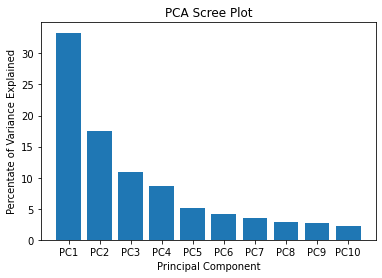

In [66]:
# Perform a Scree Plot of the Principal Components 
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6', 'PC7', 'PC8', 'PC9','PC10']
plt.bar(x = range(1,11), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

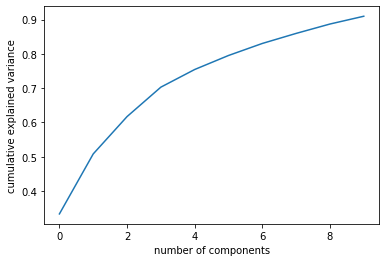

In [67]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [71]:
# Perform a Scree Plot of the Principal Components 
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(mi_df_for_pca)

In [72]:
pca_final = pd.DataFrame(pca.components_, index=["PC1","PC2","PC3","PC4"], columns = mi_df_for_pca.columns)
pca_final

,Gym,I don't really exercise,Lifting weights,Swimming,Team sport,Walking or jogging,Yoga,Zumba dance,I want to achieve a sporting goal,I want to be fit,I want to be flexible,I want to increase muscle mass and strength,I want to relieve stress,I'm sorry ... I'm not really interested in exercising,age,exercise_importance,how_often_ex,how_long
PC1,-0.135970,0.168510,-0.049135,-0.027323,-0.080882,-0.053777,-0.038778,-0.012101,-0.049413,-0.118135,-0.058363,-0.055232,-0.051906,0.090714,-0.073336,-0.508737,-0.558791,-0.573285
PC2,-0.075206,0.026999,-0.022096,-0.027581,-0.082787,0.048376,0.031151,-0.020087,-0.065748,-0.029166,0.062505,-0.057989,0.032406,-0.011702,0.942212,0.199154,-0.068604,-0.189834
PC3,-0.009062,-0.063860,-0.000410,0.022936,0.042548,0.048531,-0.023352,0.008764,-0.019654,-0.073711,-0.035043,-0.028257,-0.063417,0.015331,0.256046,-0.805311,0.451078,0.246711
PC4,-0.079556,0.020137,-0.054145,-0.069920,-0.044648,-0.003865,0.012376,-0.000675,-0.028642,0.021316,0.026247,0.000523,-0.107532,0.012427,-0.131003,0.120732,0.670762,-0.698528


<AxesSubplot:>

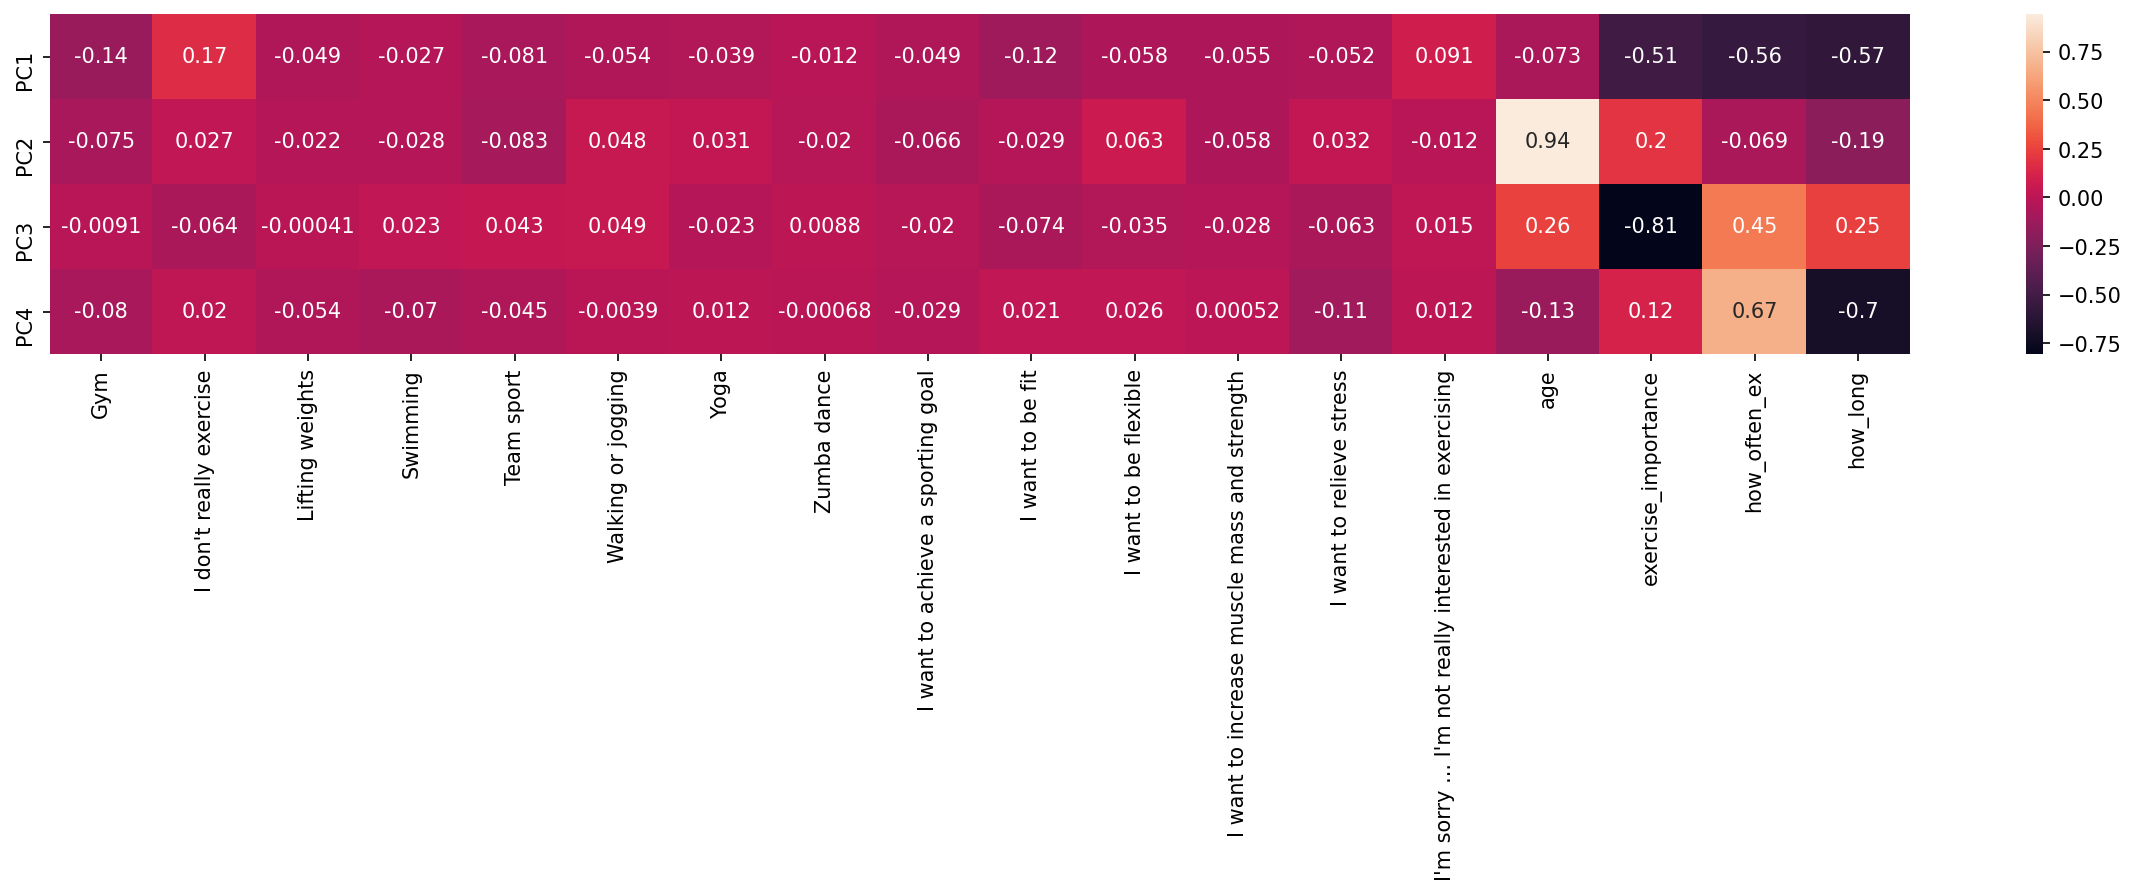

In [73]:
plt.figure(figsize=(20,3), dpi=150)
sns.heatmap(pca_final, annot=True)

In [74]:
finalPCA_DF = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2', 'PC3', 'PC4'])

In [75]:
finalPCA_DF

,PC1,PC2,PC3,PC4
0,2.911480,-0.228220,0.579344,0.090204
1,1.412915,0.230834,-1.073005,0.178508
2,1.085379,-0.946393,0.141555,-0.027173
3,-0.547798,-1.083474,-0.143656,-0.358110
4,2.192355,-0.045922,-0.317447,0.220216
...,...,...,...,...
540,0.932720,1.874585,0.921909,-0.401727
541,0.143535,0.875830,3.238140,-1.951468
542,0.542990,0.058508,-0.465460,0.016344
543,0.757671,-0.244339,0.612401,0.158234


In [76]:
# concatenamos los PCA con las variables que dejamos para el análisis
finalDf = pd.concat([finalPCA_DF,mi_df[['gender',"fitness_level"]]], axis=1)
finalDf

,PC1,PC2,PC3,PC4,gender,fitness_level
0,2.911480,-0.228220,0.579344,0.090204,Female,Good
1,1.412915,0.230834,-1.073005,0.178508,Female,Very good
2,1.085379,-0.946393,0.141555,-0.027173,Female,Good
3,-0.547798,-1.083474,-0.143656,-0.358110,Female,Good
4,2.192355,-0.045922,-0.317447,0.220216,Female,Unfit
...,...,...,...,...,...,...
540,0.932720,1.874585,0.921909,-0.401727,Female,Perfect
541,0.143535,0.875830,3.238140,-1.951468,Female,Average
542,0.542990,0.058508,-0.465460,0.016344,Female,Average
543,0.757671,-0.244339,0.612401,0.158234,Male,Good


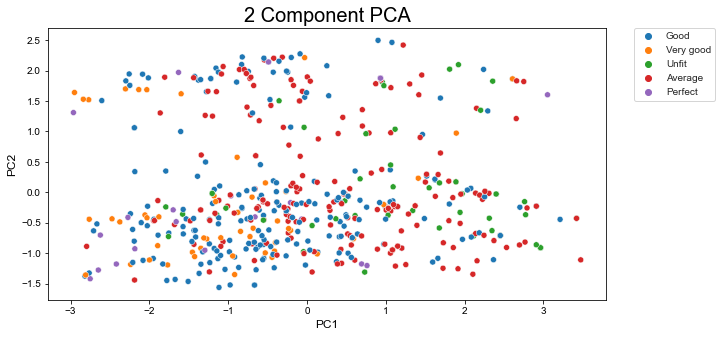

In [77]:
#Visualize 2D Projection
fig, ax = plt.subplots(figsize =(10,5))
sns.set_style("whitegrid")
g = sns.scatterplot(data = finalDf, x='PC1', y='PC2', hue='fitness_level')
plt.title('2 Component PCA', fontsize=20)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show(g)


##### No encontré la manera de mostrar gráficamente los cuatro componentes.
##### Así que los gráficos corresponden a los primeros 2, luego a los siguientes 2.

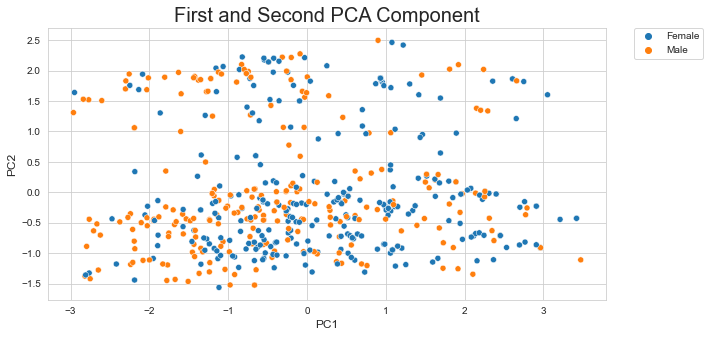

In [83]:
#Visualize 2D Projection
fig, ax = plt.subplots(figsize =(10,5))
sns.set_style("whitegrid")
g = sns.scatterplot(data = finalDf, x='PC1', y='PC2', hue='gender')
plt.title('First and Second PCA Component', fontsize=20)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show(g)

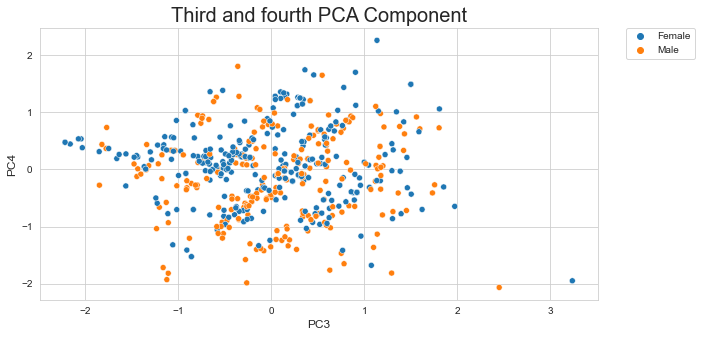

In [84]:
#Visualize 2D Projection
fig, ax = plt.subplots(figsize =(10,5))
sns.set_style("whitegrid")
g = sns.scatterplot(data = finalDf, x='PC3', y='PC4', hue='gender')
plt.title('Third and fourth PCA Component', fontsize=20)
plt.xlabel('PC3', fontsize=12)
plt.ylabel('PC4', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show(g)

## Nivell 3- Exercici 3
#### Continua amb el conjunt de dades de tema esportiu que t'agradi i normalitza les dades tenint en compte els outliers.



##### Para poder trabajar los outliers, abro un dataset con el que había trabajado ejercicios anteriores.

In [86]:
#### Opening another dataset in order to work with the outliers.
sport2 = pd.read_csv("highest_earning_players.csv")
sport2.head()

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
0,3883,Peter,Rasmussen,dupreeh,dk,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter
1,3679,Andreas,Højsleth,Xyp9x,dk,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter
2,3885,Nicolai,Reedtz,dev1ce,dk,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter
3,3672,Lukas,Rossander,gla1ve,dk,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter
4,17800,Emil,Reif,Magisk,dk,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter


In [87]:
new_sport = sport2[["TotalUSDPrize","Game","Genre"]].copy()
new_sport.head()

,TotalUSDPrize,Game,Genre
0,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter
1,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter
2,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter
3,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter
4,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter


In [88]:
# dummy de variable Game y Genre y concatenamos
dummy_game = pd.get_dummies(new_sport["Game"])
dummy_genre = pd.get_dummies(new_sport["Genre"])
new_sport.drop (["Game","Genre"], axis=1, inplace=True) 
new_sport = new_sport.merge(dummy_game, left_index=True, right_index=True)
new_sport = new_sport.merge(dummy_genre, left_index=True, right_index=True)
new_sport.head()

,TotalUSDPrize,Arena of Valor,Counter-Strike: Global Offensive,Dota 2,Fortnite,Hearthstone,Heroes of the Storm,League of Legends,Overwatch,PUBG,Starcraft II,Battle Royale,Collectible Card Game,First-Person Shooter,Multiplayer Online Battle Arena,Strategy
0,1822989.41,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1799288.57,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1787489.88,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1652350.75,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1416448.64,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [89]:
# nos quedamos con la columna TOTALUSDPrize, el resto son dummies
sport_num = new_sport.iloc[:, 0:1]
sport_num

,TotalUSDPrize
0,1822989.41
1,1799288.57
2,1787489.88
3,1652350.75
4,1416448.64
...,...
995,50734.44
996,50449.60
997,49300.00
998,48550.00


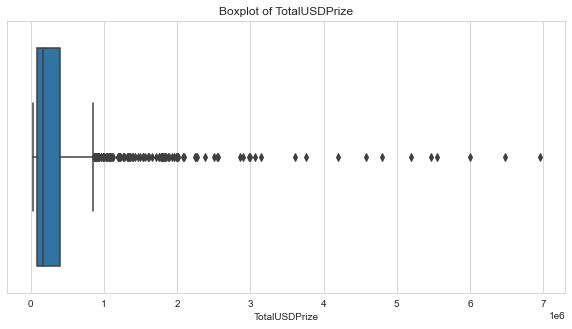

In [90]:
# Graficamos la distribución de TotalUSDPrize
fig,ax = plt.subplots(figsize = (10, 5))
sns.boxplot(data=sport_num,x=sport_num["TotalUSDPrize"])
plt.title(f"Boxplot of TotalUSDPrize")
plt.show()


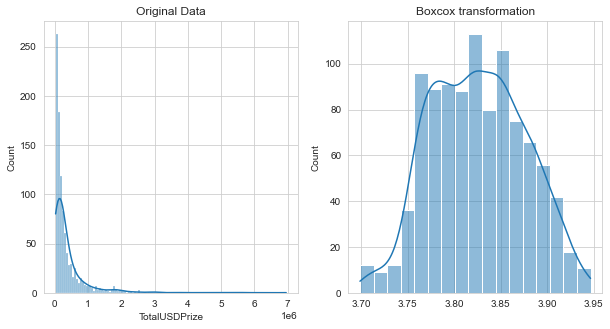

In [87]:
# boxcox transformation

a = sport_num["TotalUSDPrize"]

boxcox_trans, lmbda = stats.boxcox(a)
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))

normalized_data = stats.boxcox(a)
sns.histplot(a, ax=ax[0], kde=True )
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True)
ax[1].set_title("Boxcox transformation")
plt.show()


Best lambda parameter = -0.248


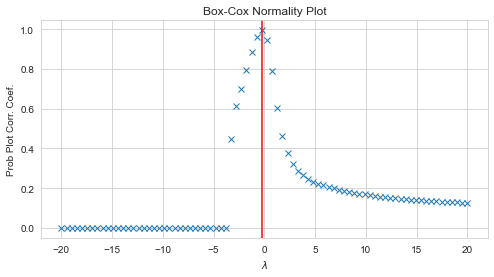

In [88]:
# Boxcox transformation calcula el coeficiente de correlación para diferentes valores lambda (λ), 
# y encuentra el valor que maximiza el coeficiente de correlación. 
# En este caso, el mejor lambda parameter es λ=−0.248

print('Best lambda parameter = %s' % round(lmbda, 3))
fig, ax = plt.subplots(figsize=(8, 4))
prob = stats.boxcox_normplot(a, -20, 20, plot=ax)
ax.axvline(lmbda, color='r');

Text(0, 0.5, '')

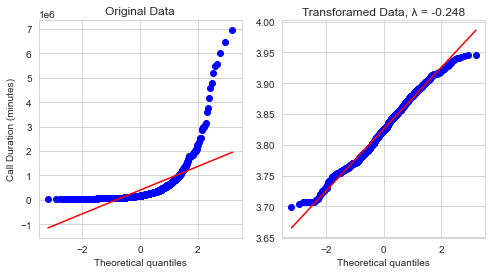

In [89]:
# Otra manera de visualizar es a través de QQPlot
# Primero, tenemos los datos originales y en el segundo recuadro la distribución con los datos transformados.

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

prob = stats.probplot(a, dist=stats.norm, plot=ax1)
prob = stats.probplot(boxcox_trans, dist=stats.norm, plot=ax2)

ax1.set_title('Original Data')
ax1.set_ylabel('Call Duration (minutes)')
ax2.set_title('Transforamed Data, λ = %s' % -0.248);
ax2.set_ylabel('')

##### La línea recta roja es la función de distribución gaussiana teórica ajustada. 
##### El gráfico con los datos originales muestran una dispersión mayor de la línea roja, que indica que probablemente los datos no siguen la distribución gaussiana.
##### El gráfico con los datos transformados muestran una distribución de los datos más cerca de la línea teórica ajustada.


In [92]:
# Otra manera de visualizar la transformación de datos
# Control chart visualization

y = sport_num["TotalUSDPrize"].values
mean = np.mean(a)
std  = np.std(a)

upper_limit = mean + 3 * std
lower_limit = mean - 3 * std

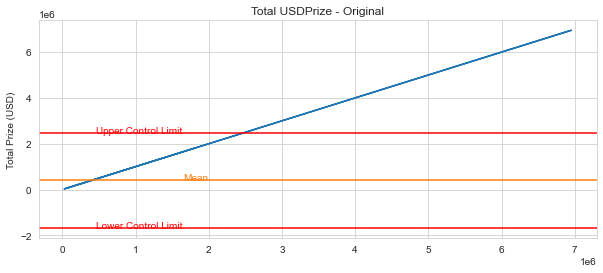

In [129]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(y, a)

ax.axhline(mean, color='C1')
ax.axhline(upper_limit, color='r')
ax.axhline(lower_limit, color='r');
ax.text(y[-200], upper_limit + 3, 'Upper Control Limit', color='r')
ax.text(y[-200], lower_limit + 3, 'Lower Control Limit', color='r')
ax.text(y[3], mean + 3, 'Mean', color='C1')
ax.set_ylabel('Total Prize (USD)');
ax.set_title('Total USDPrize - Original');

In [130]:
# The upper and lower control limits (UCL and LCL) in control charts 
# are defined as values that are three standard deviations from a mean (μ ± 3σ)

mean_trans = np.mean(boxcox_trans)
std_trans  = np.std(boxcox_trans)

upper_limit_trans = mean_trans + 3 * std_trans
lower_limit_trans = mean_trans - 3 * std_trans

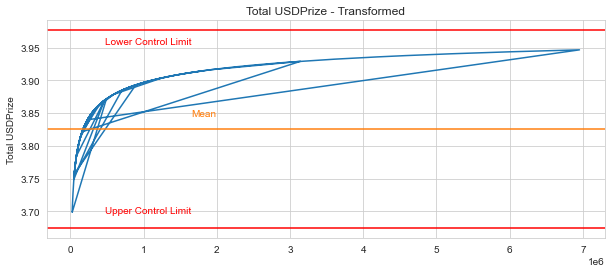

In [131]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(y, boxcox_trans)

ax.axhline(mean_trans, color='C1')
ax.axhline(upper_limit_trans, color='r')
ax.axhline(lower_limit_trans, color='r');
ax.text(y[-200], upper_limit_trans - 0.28, 'Upper Control Limit', color='r')
ax.text(y[-200], lower_limit_trans + 0.28, 'Lower Control Limit', color='r')
ax.text(y[3], mean_trans + 0.02, 'Mean', color='C1')
ax.set_ylabel('Total USDPrize');
ax.set_title('Total USDPrize - Transformed');

##### El primer gráfico muestra la distribución de datos originales
##### En el segundo, vemos cómo los datos transformados se ajustan a los límites (μ ± 3σ) 
